# Clustering o agrupamiento por k-Means

Para el ejercicio de agrupamiento, vamos a trabajar con la base de datos `CandyBars`, donde se encuentra la información sobre las marcas de dulces, las calorías, la grasa, las proteínas y los carbohidratos de cada barra.

In [ ]:
#importamos las librerías necesarias para la lectura de la base de datos

import pandas as pd

#cagamos la base de datos
data = pd.read_excel("/content/CandyBars.xlsx")

#visualizamos la información
data.head()

,Brands,Calories,Fat,Protein,Carb
0,Peanut Butter Twix,311.0,18.5,5.3,31.4
1,Baby Ruth,275.0,13.0,3.2,39.0
2,Caramel Twix,284.5,14.0,2.5,37.5
3,5th Avenue,279.5,12.5,4.5,41.0
4,Snickers,273.0,14.0,4.5,34.0


In [ ]:
#eliminamos la variable Brands, debido a que, para nuestro ejercicio, no es informativa

bars = data.drop('Brands', axis = 1)

Para las variables restantes haremos un proceso de estandarización, de tal manera
que no sean dependientes de la escala. Para la estandarización se calcula el
z-score restando a cada dato la media de las observaciones y dividiéndolo por
la desviación estándar así:

$$z\_score = \frac{x-\bar{x}}{s}$$

En caso de tener diferentes tipos de datos, es preferible usar el escalamiento:

$$x\_scaled = \frac{x-\min{x}}{\max{x} - \min{x}}$$

In [ ]:
#cargamos la librería necesaria
from sklearn.preprocessing import StandardScaler

#instanciamos el estandarizador
scaler = StandardScaler()

#aplicamos la estandarización
bars_scaled = scaler.fit_transform(bars)

#visualizamos la información. En este caso no podremos usar la función .head()
#porque el resultado es un arreglo numérico

bars_scaled

array([[ 2.27665497,  1.96041598,  1.27360284, -0.11009   ],
       [ 1.31395515,  0.60760265,  0.03816038,  0.7311412 ],
       [ 1.56800094,  0.85356871, -0.37365377,  0.56510873],
       [ 1.43429263,  0.48461962,  0.80295809,  0.95251784],
       [ 1.26047183,  0.85356871,  0.80295809,  0.17769962],
       [ 0.97968438, -2.34399007, -0.37365377,  3.71972575],
       [ 0.85934691,  0.23865356,  2.27372292,  0.17769962],
       [ 0.83260524,  1.34550083,  1.97956995, -0.76315107],
       [ 0.81923441,  0.60760265,  0.80295809, -0.26505364],
       [ 0.52507614, -0.25327856,  1.68541699,  0.50976457],
       [ 0.44485115,  0.48461962,  0.80295809, -0.43108612],
       [ 0.27103035,  0.60760265, -0.0795008 , -0.37574196],
       [ 0.27103035, -0.13029553, -0.66780673,  0.17769962],
       [ 0.2041762 ,  0.23865356,  0.50880513, -0.09902117],
       [ 0.2041762 , -1.36012583, -1.84441859,  1.94871269],
       [ 0.19080537, -0.0073125 , -0.37365377,  0.17769962],
       [ 0.16406371,  0.

In [ ]:
#aplicamos el algoritmo de clusterización de los datos
#cargamos la librería
from sklearn.cluster import KMeans

#instanciamos el modelo con los hiperparámetros deseados
kModel = KMeans(n_clusters = 4, random_state = 321)

#entrenamos el modelo con nuestros datos
kResult = kModel.fit(bars_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
#Para ver los centros de clúster estandarizados, podemos utilizar el
#atributo cluster_centers de kResult y convertirlo en un DataFrame
# Además, utilizamos la función NumPy bincount para calcular los recuentos
#de las etiquetas de los clusters.

#cargamos la librería numérica
import numpy as np

pd.DataFrame(kResult.cluster_centers_,
             columns = bars.columns).assign(Count = np.bincount(kResult.labels_))

,Calories,Fat,Protein,Carb,Count
0,-0.203634,0.395799,0.051234,-0.603268,18
1,0.440394,-1.893052,-1.354164,2.594395,3
2,-1.220772,-1.163353,-0.877916,0.157143,7
3,1.209960,0.744250,1.031744,0.219515,9


In [ ]:
#Para ver las diferencias de forma más intuitiva, invertiremos el proceso de
#estandarización
pd.DataFrame(scaler.inverse_transform(kResult.cluster_centers_),
             columns = bars.columns).assign(Count = np.bincount(kResult.labels_))


,Calories,Fat,Protein,Carb,Count
0,218.250000,12.138889,3.222222,26.944444,18
1,242.333333,2.833333,0.833333,55.833333,3
2,180.214286,5.800000,1.642857,33.814286,7
3,271.111111,13.555556,4.888889,34.377778,9


In [ ]:
#Si quieremos visualizar los datos agrupados, podremos hacer un diagrama
#de silueta así:

#cargamos la librería
from sklearn.metrics import silhouette_samples

#instanciamos los scores para el diagrama
SilhouetteScores = silhouette_samples(bars_scaled, kResult.labels_)



In [ ]:
#organizamos los datos en una tabla o dataframe
SilhouetteData = pd.DataFrame({
    'Cluster': kResult.labels_,
    'Silhouette Coefficient': SilhouetteScores,
    'Brands': data.Brands}).sort_values(['Cluster', 'Silhouette Coefficient'])

SilhouetteData.head()

,Cluster,Silhouette Coefficient,Brands
10,0,0.072409,M&M's Peanut
24,0,0.136504,Butterfinger
30,0,0.168453,Mounds
33,0,0.179425,Chunkie
12,0,0.192666,M&M's Plain


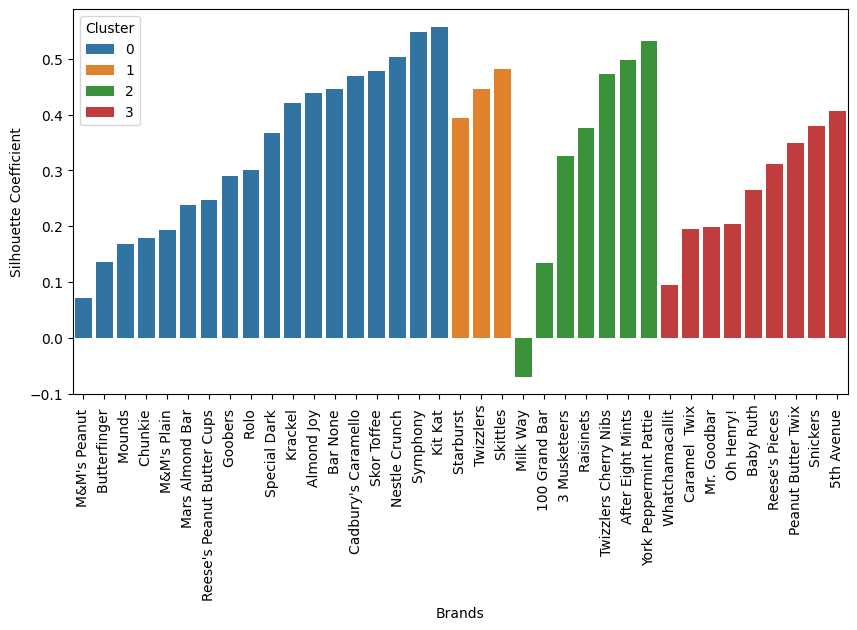

In [ ]:
#definimos el gráfico

#cargamos las librerías
import seaborn as sns
import matplotlib.pyplot as plt

#fijamos el tamaño del gráfico
plt.subplots(figsize = (10, 5))

#graficamos
sns.barplot(x = 'Brands',
            y = 'Silhouette Coefficient',
            hue = 'Cluster',
            data = SilhouetteData,
            dodge = False)

plt.xticks(rotation = 'vertical');

In [ ]:
#si queremos tener una metrica para el clustering, podemos hacerla de la
#siguiente manera

from sklearn.metrics import silhouette_score

silhouette_score(bars_scaled, kResult.labels_)

0.32567023437017034

Como podemos observar, el resultado, a pesar de ser bueno, no es ideal. Inclusive podemos observar un dato mal clusterizando con tendencia negativa en su score